In [1]:
from multiclass_functions_1 import *
import torch
from torchvision import datasets, transforms

In [2]:
transform = transforms.ToTensor()
train_DS = datasets.CIFAR10(root = '/Users/sanghyun/Desktop/GIT_Folder', train=True, download=False, transform=transform)
test_DS = datasets.CIFAR10(root  = '/Users/sanghyun/Desktop/GIT_Folder', train=False, download=False, transform=transform)
BATCH_SIZE = 32
train_DL = torch.utils.data.DataLoader(train_DS, batch_size=BATCH_SIZE, shuffle=True)
test_DL = torch.utils.data.DataLoader(test_DS, batch_size=BATCH_SIZE, shuffle=True)

In [3]:
BATCH_SIZE = 32
LR = 1e-3
EPOCH = 15
criterion = nn.CrossEntropyLoss()
new_model_train = True
model_type = "CNN_deep"
dataset = "CIFAR10"
save_model_path = f"./result/{model_type}_{dataset}.pt"

In [4]:
print(train_DS)
print(test_DS)
print(len(train_DS))
print(len(test_DS))
print(test_DS.classes)
print(test_DS.class_to_idx)

Dataset CIFAR10
    Number of datapoints: 50000
    Root location: /Users/sanghyun/Desktop/GIT_Folder
    Split: Train
    StandardTransform
Transform: ToTensor()
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: /Users/sanghyun/Desktop/GIT_Folder
    Split: Test
    StandardTransform
Transform: ToTensor()
50000
10000
['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


In [14]:
x_batch, y_batch = next(iter(test_DL))

In [28]:
print(x_batch.shape)
print(x_batch.dtype)

torch.Size([32, 3, 32, 32])
torch.float32


In [79]:
x_batch = x_batch.to(DEVICE)
y_batch = y_batch.to(DEVICE)

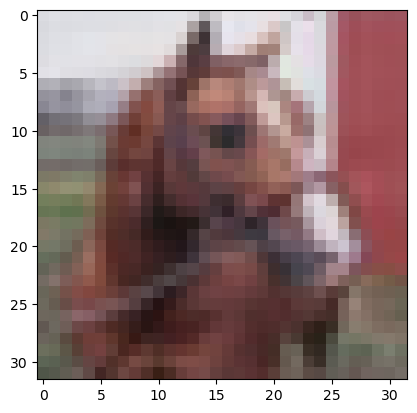

In [15]:
plt.imshow(x_batch[7].permute(1, 2, 0))

In [5]:
class CNN(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Sequential(nn.Conv2d(3, 8, 3, stride = 1, padding = 1),
                                   nn.BatchNorm2d(8), # 8개의 채널 각각에 대해, 한 배치 내 모든 픽셀 값을 평균 0, 분산 1이 되도록 정규화
                                   nn.ReLU())         # 정규화된 feature map에 ReLU 활성화 함수를 적용함
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv2 = nn.Sequential(nn.Conv2d(8, 16, 3, stride = 1, padding = 1),
                                   nn.BatchNorm2d(16),
                                   nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv3 = nn.Sequential(nn.Conv2d(16, 32, 3, stride = 1, padding = 1),
                                   nn.BatchNorm2d(32),
                                   nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)

        self.fc = nn.Linear(32 * 4 * 4, 10)


    def forward(self, x):
        x = self.conv1(x)
        x = self.Maxpool1(x)
        x = self.conv2(x)
        x = self.Maxpool2(x)
        x = self.conv3(x)
        x = self.Maxpool3(x)

        x = torch.flatten(x, start_dim=1)
        x = self.fc(x)
        return x


class CNN_deep(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block1 = nn.Sequential(nn.Conv2d(3,32,3,padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU(),
                                         nn.Conv2d(32,32,3,padding=1),
                                         nn.BatchNorm2d(32),
                                         nn.ReLU())
        self.Maxpool1 = nn.MaxPool2d(2)

        self.conv_block2 = nn.Sequential(nn.Conv2d(32,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU(),
                                         nn.Conv2d(64,64,3,padding=1),
                                         nn.BatchNorm2d(64),
                                         nn.ReLU())
        self.Maxpool2 = nn.MaxPool2d(2)

        self.conv_block3 = nn.Sequential(nn.Conv2d(64,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU(),
                                         nn.Conv2d(128,128,3,padding=1),
                                         nn.BatchNorm2d(128),
                                         nn.ReLU())
        self.Maxpool3 = nn.MaxPool2d(2)

        self.classifier = nn.Sequential(nn.Linear(128*4*4,512),
                                        nn.Linear(512,10))

    def forward(self, x):
        x = self.conv_block1(x)
        x = self.Maxpool1(x)
        x = self.conv_block2(x)
        x = self.Maxpool2(x)
        x = self.conv_block3(x)
        x = self.Maxpool3(x)
        x = torch.flatten(x, start_dim=1)
        x = self.classifier(x)
        return x

In [6]:
exec(f"model = {model_type}().to(DEVICE)")
print(model)

CNN_deep(
  (conv_block1): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
  )
  (Maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_block2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): BatchNorm2d(64, eps=1e-05, momentum=

Epoch 1/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 1, train loss: 1.516
--------------------


Epoch 2/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 2, train loss: 0.944
--------------------


Epoch 3/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 3, train loss: 0.732
--------------------


Epoch 4/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 4, train loss: 0.604
--------------------


Epoch 5/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 5, train loss: 0.512
--------------------


Epoch 6/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 6, train loss: 0.432
--------------------


Epoch 7/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 7, train loss: 0.369
--------------------


Epoch 8/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 8, train loss: 0.31
--------------------


Epoch 9/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 9, train loss: 0.265
--------------------


Epoch 10/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 10, train loss: 0.218
--------------------


Epoch 11/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 11, train loss: 0.183
--------------------


Epoch 12/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 12, train loss: 0.161
--------------------


Epoch 13/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 13, train loss: 0.134
--------------------


Epoch 14/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 14, train loss: 0.124
--------------------


Epoch 15/15:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 15, train loss: 0.111
--------------------


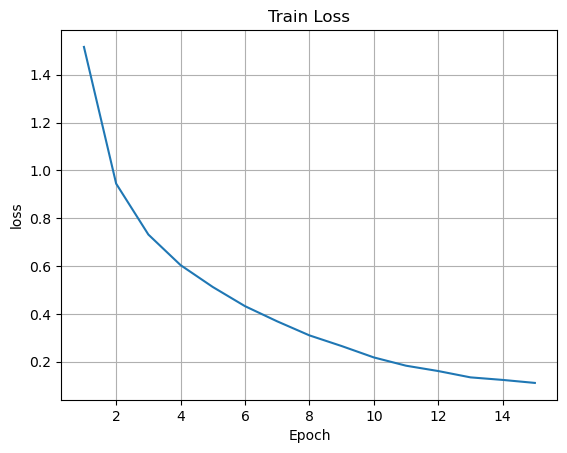

In [7]:
if new_model_train:
    optimizer = optim.Adam(model.parameters(), lr=LR)
    loss_history = Train(model, train_DL, criterion, optimizer, EPOCH)

    torch.save(model, save_model_path)

    plt.plot(range(1,EPOCH+1),loss_history)
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.title("Train Loss")
    plt.grid()

In [8]:
load_model = torch.load(save_model_path, map_location=DEVICE, weights_only=False)

In [9]:
Test(load_model, test_DL)

Test accuracy: 8328/10000 (83.3 %)


1527018


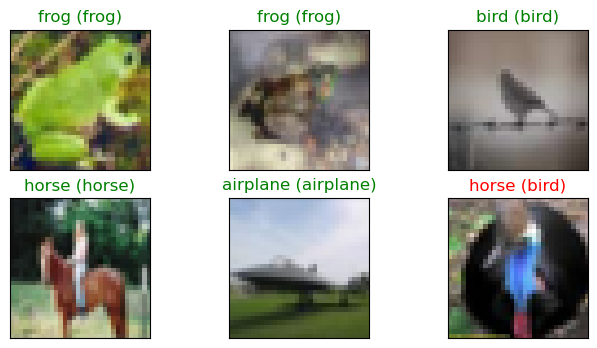

In [16]:
Test_plot(load_model, test_DL)
print(count_params(load_model))